# Homework 2
## Author: 
## Date: 

##### Remember to change the `author: ` field on this Rmd file to your own name.

### Problem 1: table(), tapply()

We'll start by downloading a publicly available dataset that contains some census data information.  This dataset is called `income`.


In [1]:
# Import data file

income <- read.csv("https://www.colorado.edu/amath/sites/default/files/attached-files/income_data.txt"
, header = FALSE)

# Give variables names
colnames(income) <- c("age", "workclass", "fnlwgt", "education", "education.years", "marital.status", "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss", "hours.per.week", "native.country", "income.bracket")


##### (a) table()

Use the `table()` function to produce a contingency table of observation counts across **marital status** and **sex**.

In [4]:
married.sex.table <- table(income$marital.status, income$sex)
married.sex.table

                       
                        Female  Male
  Divorced                2672  1771
  Married-AF-spouse         14     9
  Married-civ-spouse      1657 13319
  Married-spouse-absent    205   213
  Never-married           4767  5916
  Separated                631   394
  Widowed                  825   168

##### (b)  The `prop.table()` 
This function calculates a table of proportions from a table of counts.  Read the documentation for this function to see how it works.  Use `prop.table()` and your table from problem **(a)** to form a (column) proportions table.  The Female column of the table should show the proportion of women in each marital status category.  The Male column will show the same, but for men.

In [10]:
married.sex.prop <- prop.table(married.sex.table, margin = 2)
married.sex.prop

                       
                              Female         Male
  Divorced              0.2480735308 0.0812758146
  Married-AF-spouse     0.0012997865 0.0004130335
  Married-civ-spouse    0.1538390122 0.6112436898
  Married-spouse-absent 0.0190325875 0.0097751262
  Never-married         0.4425772909 0.2715006884
  Separated             0.0585832328 0.0180816888
  Widowed               0.0765945595 0.0077099587

##### (c)  Use part (b) to answer the following questions.   
In this data set, are women more or less likely than men to be married?  Are women more or less likely to be Widowed?  (As part of your answer, calculate the % of individuals in each group who report being married, and the % who report being widowed.  Use inline code chunks when reporting these values.)


In [29]:
female.married <- round(100*(married.sex.prop[2,1] + married.sex.prop[3,1]), 2)
male.married <- round(100*(married.sex.prop[2,2] + married.sex.prop[3,2]), 2)

female.wid <- round(100*married.sex.prop[7,1], 2)
male.wid <- round(100*married.sex.prop[7,2],2)

{{female.married}}% of women are married, which is more than the percentage of men ({{male.married}}%). Similarly, {{female.wid}}% of women are widowed, which is more than the percentage of men ({{male.wid}}%).

##### (d) tapply()

Use the `tapply()` function to produce a table showing the average **education** (in years) across **marital status** and **sex** categories.


In [38]:
tapply(income$education.years, income[c('marital.status', 'sex')], mean)

,Female,Male
Divorced,10.070359,9.970073
Married-AF-spouse,10.142857,10.222222
Married-civ-spouse,10.378998,10.313387
Married-spouse-absent,9.751220,8.882629
Never-married,10.181246,9.786173
Separated,9.212361,9.423858
Widowed,9.092121,9.101190


### Problem 2: A more complex `tapply()` example (calculating Claims per Holder)

The `MASS` package contains a dataset called Insurance.  Read the help file on this data set to understand its contents.


In [43]:
library(MASS)

##### (a) Total number of Holders by District and Age

Use the `tapply()` function to produce a table showing the total number of Holders across District and Age.  Save this table in a variable, and also display your answer.


In [48]:
holders.age.district <- tapply(Insurance$Holders, Insurance[c('District', 'Age')], sum)
holders.age.district

,<25,25-29,30-35,>35
1,638,1157,1396,7354
2,309,675,863,4806
3,119,335,493,3220
4,72,169,255,1498


##### (b) Total number of Claims by District and Age

Use the `tapply()` function to produce a table showing the total number of Claims across District and Age  Save this table in a variable, and also display your answer.


In [47]:
claims.age.district <- tapply(Insurance$Claims, Insurance[c('District', 'Age')], sum)
claims.age.district

,<25,25-29,30-35,>35
1,124,189,202,866
2,65,131,122,573
3,26,56,79,392
4,14,28,50,234


##### (c) Rate of Claims per Holder by District and Age

Use your answers from parts **(a)** and **(b)** to produce a table that shows the rate of Claims per Holder across District and Age. 


In [49]:
claims.age.district/holders.age.district

,<25,25-29,30-35,>35
1,0.1943574,0.1633535,0.1446991,0.1177590
2,0.2103560,0.1940741,0.1413673,0.1192260
3,0.2184874,0.1671642,0.1602434,0.1217391
4,0.1944444,0.1656805,0.1960784,0.1562083



**Tip:** *If an insurance company has 120,000 policy holders and receives 14,000 claims, the rate of claims per holder is 14000/120000 = `r round(14000/120000,3) `*


##### (d) Do you observe any trends in how the number of claims per holder varies with age?  

In general, the number of claims per holder decreases with age across all districts.

### Problem 3: Someone left strings in your numeric column!

This exercise will give you practice with two of the most common data cleaning tasks.  For this problem we'll use the `survey_untidy.txt` data set posted on my personal APPM website..  Begin by importing this data into R.  The url for the data set is shown below.


url: https://www.colorado.edu/amath/sites/default/files/attached-files/survey_data2020_messy.txt


In Lecture 4 we look at an example of cleaning up the TVhours column.  The TVhours column of `survey_untidy.txt` has been corrupted in a similar way to what you saw in class.  

Using the techniques you saw in class, make a new version of the untidy survey data where the TVhours column has been cleaned up. (Hint: *you may need to handle some of the observations on a case-by-case basis*)


In [5]:
survey.messy <- read.csv("https://www.colorado.edu/amath/sites/default/files/attached-files/survey_untidy_mixed_program_column_hw_2.txt", 
                         sep = "\t", stringsAsFactors = FALSE)

In [10]:
survey.clean <- survey.messy
survey.clean$TVhours <- gsub("none", "0", survey.clean$TVhours) # Replacing none entries by 0
survey.clean$TVhours <- gsub("zero", "0", survey.clean$TVhours) # Replacing zero entries by 0
survey.clean$TVhours <- gsub("twenty", "20", survey.clean$TVhours) # Replacing twenty entries by 20
survey.clean$TVhours <- as.numeric(gsub("[^0-9.]", "", survey.clean$TVhours)) # Only retaining numerical values

In [11]:
survey.clean$TVhours

[1]  0.0  3.5 30.0  6.0 20.0 15.0  6.0  8.0 10.0  0.0  4.0  0.0  0.0  2.0 24.0
[16] 10.0 25.0  0.0  0.0 10.0  5.0 35.0  2.5  2.0  5.0  0.0  0.0  0.0 10.0  5.0
[31] 40.0 10.0  0.0 20.0  0.0  6.0  2.0 10.0 10.0  7.0

### Problem 4: Shouldn't ppm, pPM and PPM all be the same thing?

This exercise picks up from Problem 3, and walks you through two different approaches to cleaning up the Program column


##### (a) Identifying the problem.

Use the `table` or `levels` command on the Program column to figure out what went wrong with this column.  Describe the problem in the space below.


In [12]:
table(survey.clean$Program)


 mism  mISM  MIsM  MISM other Other   ppm   ppM   PPm   PPM 
    3     2     1    15     3     7     2     1     1     5 

What should be the same categories appear different because of the mix of uppercase and lowercase characters.

##### (b) `mapvalues` approach

Starting with the cleaned up data you produced in Problem 3, use the `mapvalues` and `mutate` functions to fix the Program column by mapping all of the lowercase and mixed case program names to upper case.  

In [13]:
library(plyr)
library(dplyr)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [19]:
mod.program <- survey.clean %>% 
    mutate(Program = mapvalues(Program, 
                               from = c('mism', 'mISM', 'MIsM', 'other', 'ppm', 'ppM','PPm'),
                               to = c('MISM', 'MISM', 'MISM', 'Other', 'PPM', 'PPM','PPM')))
table(mod.program$Program)


 MISM Other   PPM 
   21    10     9 

##### (c) `toupper` approach

The `toupper` function takes an array of character strings and converts all letters to uppercase.

Use `toupper()` and `mutate` to perform the same data cleaning task as in part (b).  

In [20]:
mod.program2 <- survey.clean %>% 
    mutate(Program = toupper(Program))
table(mod.program2$Program)


 MISM OTHER   PPM 
   21    10     9 

**Tip**: *The `toupper()` and `tolower()` functions are very useful in data cleaning tasks.  You may want to start by running these functions even if you'll have to do some more spot-cleaning later on.*

### Problem 5: Let's apply some functions

##### (a) Writing trimmed mean function

Write a function that calculates the mean of a numeric vector `x`, ignoring the `s` smallest and `l` largest values (this is a *trimmed mean*).  

E.g., if `x = c(1, 7, 3, 2, 5, 0.5, 9, 10)`, `s = 1`, and `l = 2`, your function would return the mean of `c(1, 7, 3, 2, 5)` (this is `x` with the 1 smallest value (0.5) and the 2 largest values (9, 10) removed).

Your function should use the `length()` function to check if `x` has at least `s + l + 1` values.  If `x` is shorter than `s + l + 1`, your function should use the `message()` function to tell the user that the vector can't be trimmed as requested.  If `x` is at least length `s + l + 1`, your function should return the trimmed mean.

In [107]:
tst <- c(2,3,5,6,7,8)
tst[1:(length(tst)-2)]

[1] 2 3 5 6

In [129]:
# Here's a function skeleton to get you started

# This function takes in a vector x, and numbers s and l
# It then trims the vector x by removing its s smallest
# values and its l greatest values, and computes its mean

trimmedMean <- function(x, s = 0, l = 0) {
  if(s+l+1 > length(x)){
      message('This vector is too short')
  }
  else{
      x.sorted <- sort(x)
      x.trimmed <- x.sorted[(s+1):(length(x.sorted)-l)]
      return(mean(x.trimmed))
  }
}

In [130]:
x = c(1, 7, 3, 2, 5, 0.5, 9, 10)
trimmedMean(x, s= 1, l=2)

[1] 3.6

**Hint:** *For this exercise it will be useful to recall the `sort()` function that you first saw in Lecture 1.*

**Note:** The `s = 0` and `l = 0` specified in the function definition are the default settings.  i.e., this syntax ensures that if `s` and `l` are not provided by the user, they are both set to `0`.  Thus the default behaviour is that the `trimmedMean` function doesn't trim anything, and hence is the same as the `mean` function.  

##### (b) Apply your function with a for loop

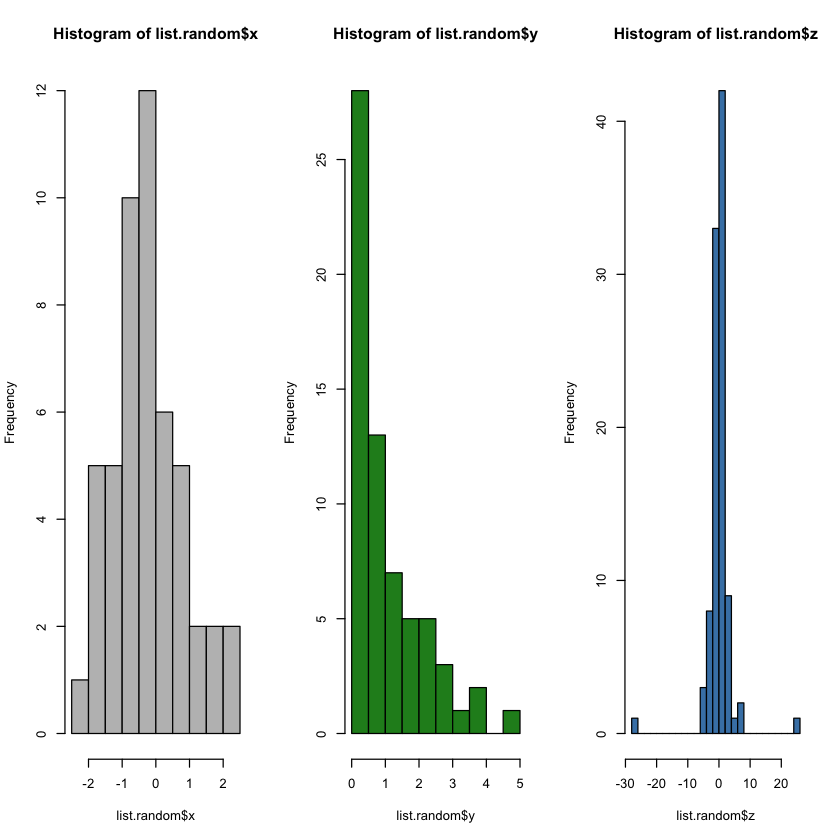

In [131]:
set.seed(201802) # Sets seed to make sure everyone's random vectors are generated the same
list.random <- list(x = rnorm(50), 
                    y = rexp(65),
                    z = rt(100, df = 1.5))

# Here's a Figure showing histograms of the data
par(mfrow = c(1,3))
hist(list.random$x, breaks = 15, col = 'grey')
hist(list.random$y, breaks = 10, col = 'forestgreen')
hist(list.random$z, breaks = 20, col = 'steelblue')

Using a `for loop` and your function from part **(a)**, create a vector whose elements are the trimmed means of the vectors in `list.random`, taking `s = 5` and `l = 5`. 


In [133]:
for(x in list.random){
    tm <- trimmedMean(x, s = 5, l = 5)
    print(tm)
}

[1] -0.2589805
[1] 0.8828572
[1] 0.09086078


##### (c) Calculate the un-trimmed means for each of the vectors in the list.  How do these compare to the trimmed means you calculated in part (b)?  Explain your findings.  


In [134]:
for(x in list.random){
    print(mean(x))
}

[1] -0.2217119
[1] 1.03796
[1] 0.06563583


The first and third means are smaller than their trimmed counterparts, whereas the second mean is greater than its trimmed equivalent. This suggests that the values of the smaller vector elements we removed in the first and third case had more weight than in the second case.

##### (d) lapply(), sapply()

Repeat part **(b)**, using the `lapply` and `sapply` functions instead of a for loop.  Your `lapply` command should return a list of trimmed means, and your `sapply` command should return a vector of trimmed means.


In [136]:
lapply(list.random, trimmedMean, s = 5, l = 5)

$x
[1] -0.2589805

$y
[1] 0.8828572

$z
[1] 0.09086078

In [137]:
sapply(list.random, trimmedMean, s = 5, l = 5)

x           y           z 
-0.25898051  0.88285719  0.09086078

**Hint** `lapply` and `sapply` can take arguments that you wish to pass to the `trimmedMean` function.  E.g., if you were applying the function `sort`, which has an argument `decreasing`, you could use the syntax `lapply(..., FUN = sort, decreasing = TRUE)`.